In [30]:
#JMJ
#Launched on 1/19/2018
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#With header you specify the column to take into account as the header
df=pd.read_csv('default of credit card clients.csv',header=1)
df.head()
df.info()
#Renaming the variables
print("\n")
print("Renaming the variables \n")
df.rename(columns=({'PAY_0':'PAY_1','default payment next month':'default_next_m'}), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [ ]:
| Name                       | data type   | Description                                                                                                                       | Coding                                                               |
|----------------------------|-------------|-----------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------|
| ID                         |             | Customer identifier                                                                                                               |                                                                      |
| LIMIT_BAL                  | Interval    | Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit |                                                                      |
| SEX                        | categorical | Sex of the customer                                                                                                               | Gender (1 = male; 2 = female).                                       |
| EDUCATION                  | Ordinal     | Level of education                                                                                                                | (1 = graduate school; 2 = university; 3 = high school; 4 = others). |
| MARRIAGE                   | categorical | Marital Status                                                                                                                    | (1 = married; 2 = single; 3 = others).                               |
| AGE                        | Ordinal     | Age of the customer                                                                                                               |                                                                      |
| PAY_0                      | Interval    | Repayment Status in September 2005                                                                                                |                                                                      |
| PAY_2                      | Interval    | Repayment Status in August 2005                                                                                                   |                                                                      |
| PAY_3                      | Interval    | Repayment Status in July 2005                                                                                                     |                                                                      |
| PAY_4                      | Interval    | Repayment Status in June 2005                                                                                                     |                                                                      |
| PAY_5                      | Interval    | Repayment Status in May 2005                                                                                                      |                                                                      |
| PAY_6                      | Interval    | Repayment Status in April 2005                                                                                                    |                                                                      |
| BILL_AMT1                  | Interval    | Amount of bill statement in September 2005                                                                                        |                                                                      |
| BILL_AMT2                  | Interval    | Amount of bill statement in August 2005                                                                                           |                                                                      |
| BILL_AMT3                  | Interval    | Amount of bill statement in July 2005                                                                                             |                                                                      |
| BILL_AMT4                  | Interval    | Amount of bill statement in June 2005                                                                                             |                                                                      |
| BILL_AMT5                  | Interval    | Amount of bill statement in May 2005                                                                                              |                                                                      |
| BILL_AMT6                  | Interval    | Amount of bill statement in April 2005                                                                                            |                                                                      |
| PAY_AMT1                   | Interval    | Amount paid in September 2005                                                                                                     |                                                                      |
| PAY_AMT2                   | Interval    | Amount paid in August 2005                                                                                                        |                                                                      |
| PAY_AMT3                   | Interval    | Amount paid in July 2005                                                                                                          |                                                                      |
| PAY_AMT4                   | Interval    | Amount paid in June 2005                                                                                                          |                                                                      |
| PAY_AMT5                   | Interval    | Amount paid in May 2005                                                                                                           |                                                                      |
| PAY_AMT6                   | Interval    | Amount paid in April 2005                                                                                                         |                                                                      |
| default payment next month | ordinal     | Default payment                                                                                                                   | (Yes = 1, No = 0)                                                    |
|                            |             |                                                                                                                                   |                                                                      |
|                            |             |                                                                                                                                   |                                                                      |

In [ ]:
my_tab = pd.crosstab(index=df["AGE"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab


In [191]:
#FREQUENCY TABLES - AGE RANGES FROM 21 UP TO 79
my_tab = pd.crosstab(index=df["SEX"],  # Make a crosstab
                              columns="count")      # Name the count column

print my_tab


my_tab = pd.crosstab(index=df["EDUCATION"],  # Make a crosstab
                              columns="count")      # Name the count column

print my_tab

my_tab = pd.crosstab(index=df["MARRIAGE"],  # Make a crosstab
                              columns="count")      # Name the count column

print my_tab




col_0  count
SEX         
1      11888
2      18112
col_0      count
EDUCATION       
0             14
1          10585
2          14030
3           4917
4            123
5            280
6             51
col_0     count
MARRIAGE       
0            54
1         13659
2         15964
3           323


In [166]:
#Creating BINS FOR AGE
BINS=['(20,24]','[25,65]','[66,79]']

df['AGE_range']=pd.cut(df.AGE,[20,24,65,100],3,labels=BINS)
my_tab = pd.crosstab(index=df["AGE_range"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab
#I need to create a function here to call pass
#1) name of the range
#2) the list with the cut-offs for  the bins
#3 the list with the labels of the bins




col_0,count
AGE_range,
"(20,24]",2685
"[25,65]",27229
"[66,79]",86


In [69]:
#CREATING BIVARIATE TABLES
#margins=True
default_age=pd.crosstab([df['AGE_range']],df.default_next_m.astype(bool))
print default_age
#Axis=0 is very important HERE to make the division for EACH ROW
defaultRate_age=default_age.div(default_age.sum(1).astype(float),axis=0)
print defaultRate_age
#I had to create it like that because if at the beginning I use margins, it will not calculate the default rate by th total in the bin
default_age=pd.crosstab([df['AGE_range']],df.default_next_m.astype(bool),margins=True)
print default_age

default_next_m  False  True 
AGE_range                   
(20,24]          1955    730
[25,65]         21346   5883
[66,79]            63     23
default_next_m     False     True 
AGE_range                         
(20,24]         0.728119  0.271881
[25,65]         0.783944  0.216056
[66,79]         0.732558  0.267442
default_next_m  False  True    All
AGE_range                         
(20,24]          1955   730   2685
[25,65]         21346  5883  27229
[66,79]            63    23     86
All             23364  6636  30000


In [187]:
##### FUNCTION TO CREATE FREQUENCY TABLES FOR
#FREQUENCY TABLES - AGE RANGES FROM 21 UP TO 79
#my_tab = pd.crosstab(index=df["AGE"],  # Make a crosstab
                             # columns="count")      # Name the count column

#my_tab

df.describe()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_m
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [188]:
#### Validating we Do not have missing values
df.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_next_m    0
AGE_range         0
dtype: int64

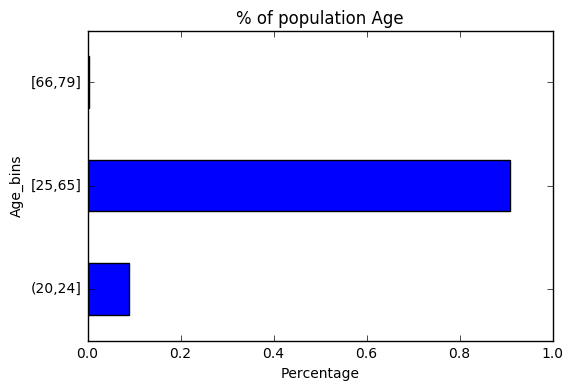

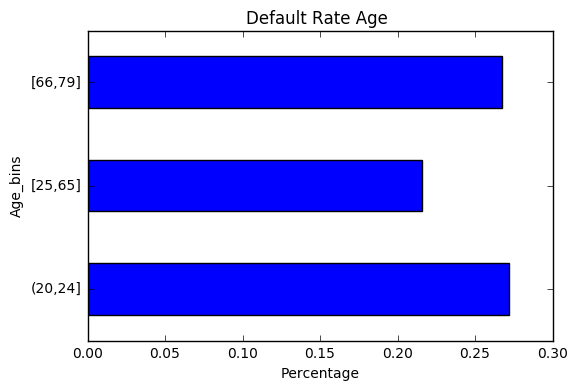

In [182]:
########### CREATING A FUNCTION TO EXECUTE BIVARIATES
def bivariate_v1(var_name,RangeName,CutOff,NumBins,BinLabel,var_x,var_y,title1,title2):
#def bivariate_v1(NumBins): 
    #Creating the BINS
    df[RangeName]=pd.cut(var_name,CutOff,NumBins,labels=BinLabel)
    #Grouping by the BINS variable
    default_age_g=df.groupby(by=[RangeName])
    #% of POPULATION
    bins_percentage=default_age_g[RangeName].count()/df[RangeName].count()
   
    
    #CHART WITH THE %OF POPULATION WITH THE BINS
    #print bins_percentage

    ax=bins_percentage.plot(kind='barh')
    plt.title(title1)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.show()
    
    ### default rate
    t=default_age_g.default_next_m.sum()/default_age_g.default_next_m.count()
  

    ax=t.plot(kind='barh')
    plt.title(title2)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.show()

bivariate_v1(df.AGE,'AGE_range',[20,24,65,100],3,['(20,24]','[25,65]','[66,79]'],'Percentage','Age_bins','% of population Age','Default Rate Age ')



In [211]:
########checking for duplicates in the ID
df['is_duplicated']=df.duplicated('ID')
print "The number of duplicates is:"
print df['is_duplicated'].sum()

df.drop('is_duplicated', axis=1, inplace=True)
#df.info()


The number of duplicates is:
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_1             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PA

In [255]:
##### correlations
print(df.corr())

                      ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID              1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL       0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX             0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION       0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE       -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE             0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_1          -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2          -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3          -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4          -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5          -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6          -0.020270  -0.235195 -0.0

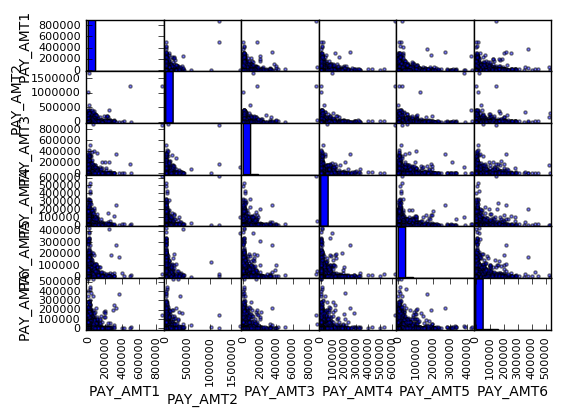

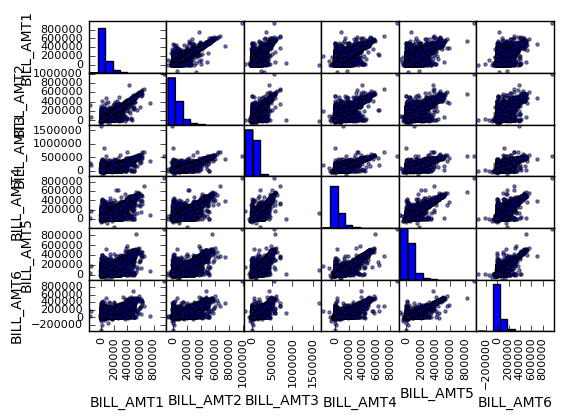

In [254]:
#Scatter Plot --- 
from pandas.tools.plotting import scatter_matrix
#df_test=df[['default_next_m','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
df_test=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
ax=scatter_matrix(df_test)
plt.show()

df_test=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
ax=scatter_matrix(df_test)
plt.show()


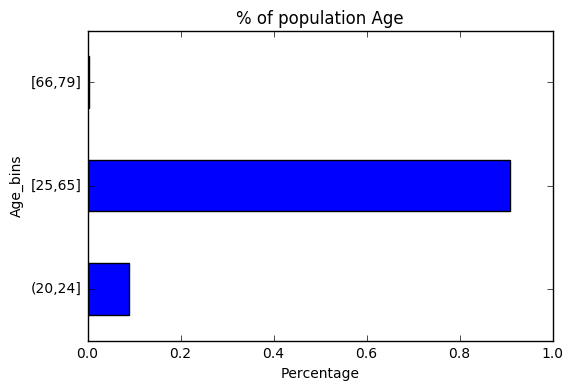

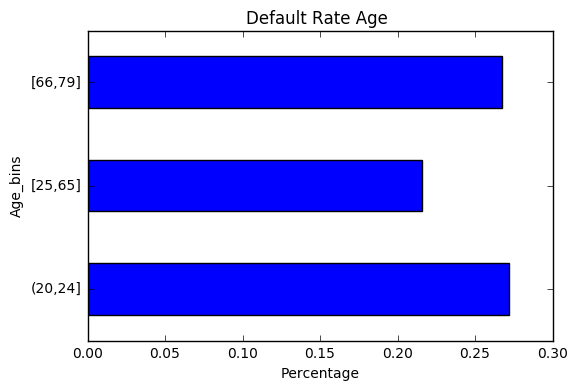

In [219]:
##### START BIVARIATE

#1)CREATE BINS
BINS=['(20,24]','[25,65]','[66,79]']

df['AGE_range']=pd.cut(df.AGE,[20,24,65,100],3,labels=BINS)


var_y='Age_bins'
var_x='Percentage'
title1='% of population Age'
title2='Default Rate Age '

#Group the data first
default_age_g=df.groupby(by=['AGE_range'])


#Verifying the number of observations per bin
#print default_age_c


#Using series in PANDAS with the grouped data we obtain the % of the population
bins_percentage=default_age_g['AGE_range'].count()/df['AGE_range'].count()

#print bins_percentage

ax=bins_percentage.plot(kind='barh')
plt.title(title1)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.show()

t=default_age_g.default_next_m.sum()/default_age_g.default_next_m.count()
#print t

ax=t.plot(kind='barh')
plt.title(title2)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.show()

##### END BIVARIATE BIVARIATE

#default_age_c=default_age_g
default_age_c=df['AGE_range'].value_counts()






#By converting it into a Matrix, I get the results in a list
#np_df =default_age_g.as_matrix()
import numpy as np
np_P_age_g=np.array(default_age_c)
#print np_P_age_g


#it counts the total
total=df['AGE_range'].count()
#print total

#Percentage of population - DO NOT FORGET THE FLOAT
p_age_g=np_P_age_g/float(total)
#print p_age_g

def_rate_ageG=default_age_g.default_next_m.sum()/default_age_g.default_next_m.count()
#print def_rate_ageG
#then to an array
np_def_rate_ageG=np.array(def_rate_ageG)
#print np_def_rate_ageG




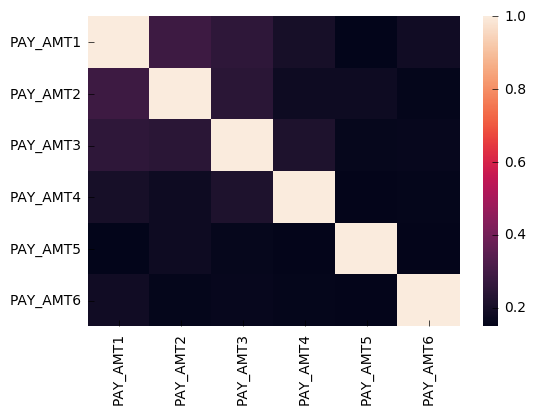

In [256]:
#### correlation matrix
#!conda install seaborn
#pip install seaborn
import seaborn as sns

df_test=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

corr = df_test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)




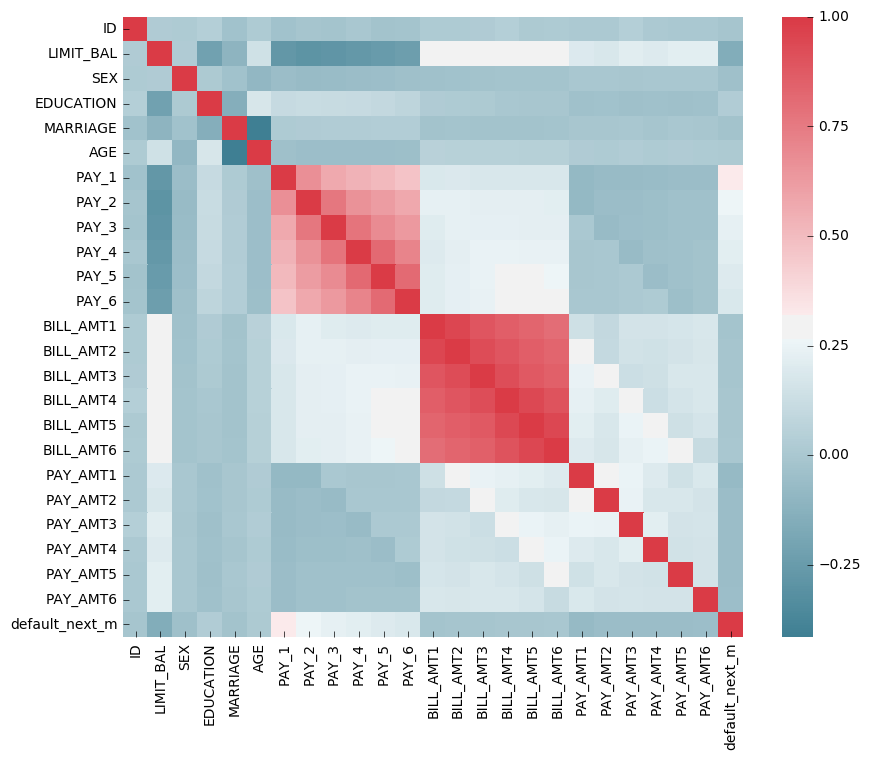

In [259]:
##### other approach 

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

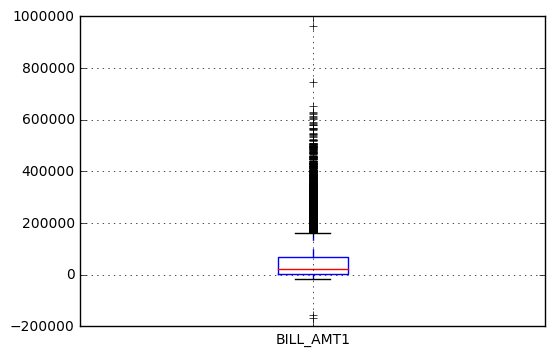

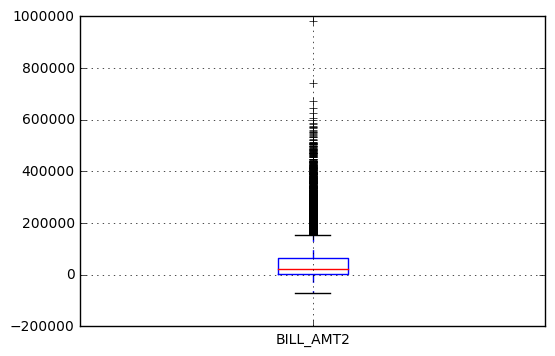

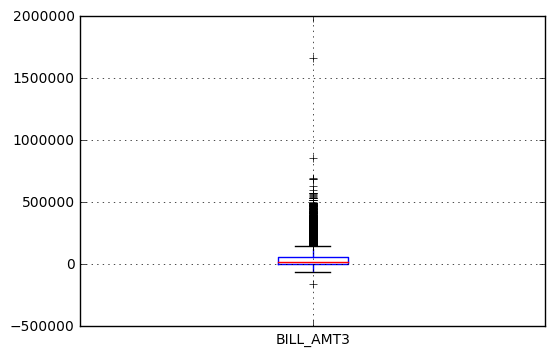

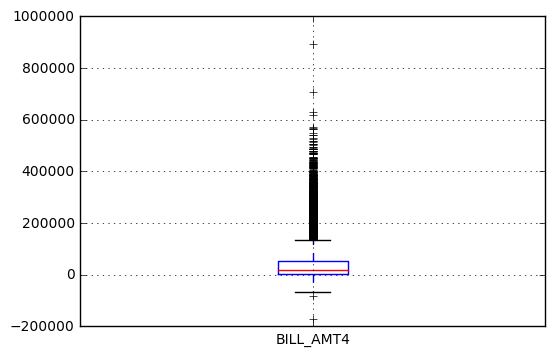

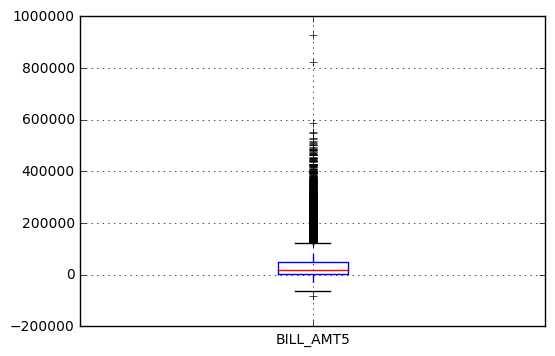

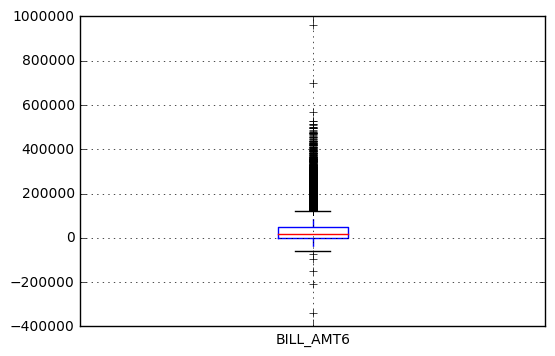

In [244]:
####BOX PLOTS FOR AMOUNT OF BILL STATEMENT
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

#print(df.corr())
ax=df.boxplot(column='BILL_AMT1',return_type='dict')
plt.show()


ax=df.boxplot(column='BILL_AMT2',return_type='dict')
plt.show()
ax=df.boxplot(column='BILL_AMT3',return_type='dict')
plt.show()
ax=df.boxplot(column='BILL_AMT4',return_type='dict')
plt.show()
ax=df.boxplot(column='BILL_AMT5',return_type='dict')
plt.show()
ax=df.boxplot(column='BILL_AMT6',return_type='dict')
plt.show()
#import seaborn as sns
#corr = df.corr()
#sns.heatmap(corr, 
#            xticklabels=corr.columns.values,
#          yticklabels=corr.columns.values)

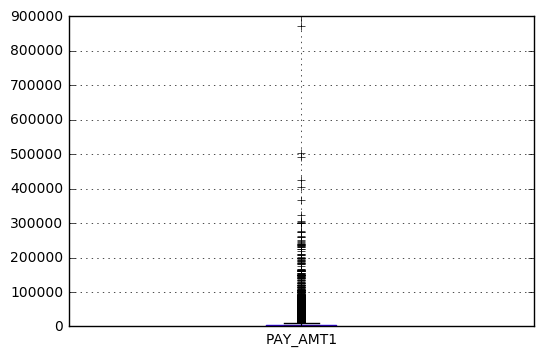

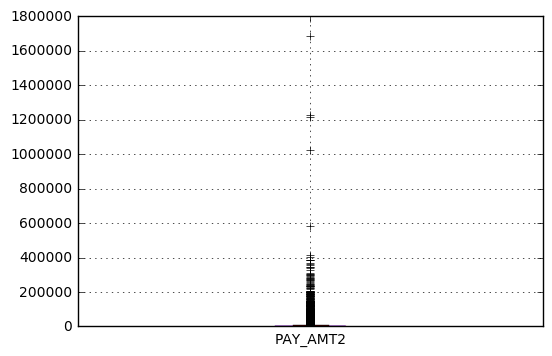

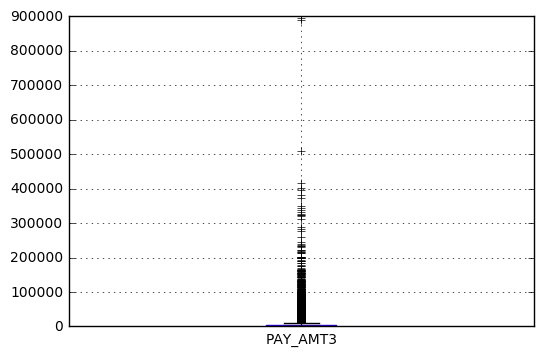

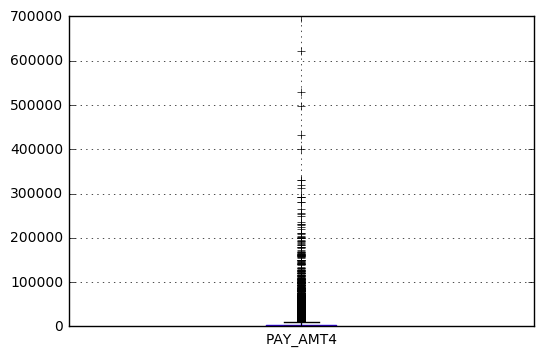

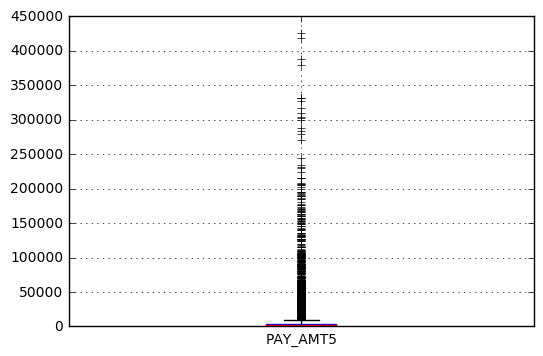

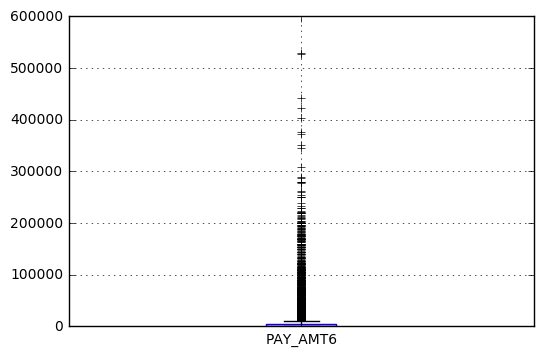

In [245]:
####BOX PLOTS FOR AMOUNT PAID
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

#print(df.corr())
ax=df.boxplot(column='PAY_AMT1',return_type='dict')
plt.show()


ax=df.boxplot(column='PAY_AMT2',return_type='dict')
plt.show()
ax=df.boxplot(column='PAY_AMT3',return_type='dict')
plt.show()
ax=df.boxplot(column='PAY_AMT4',return_type='dict')
plt.show()
ax=df.boxplot(column='PAY_AMT5',return_type='dict')
plt.show()
ax=df.boxplot(column='PAY_AMT6',return_type='dict')
plt.show()

In [ ]:
################ correlations

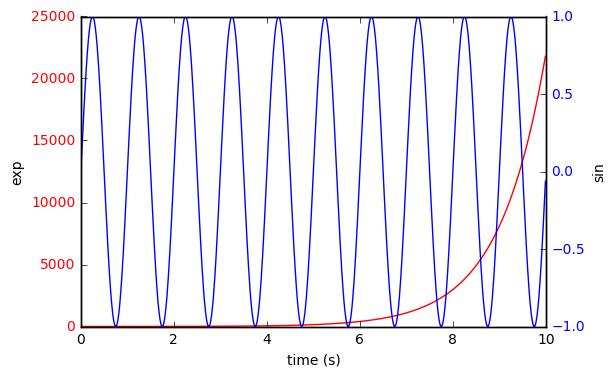

In [127]:
#making the charts
import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('exp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('sin')
    return ax1, ax2


# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.sin(2 * np.pi * t)

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()



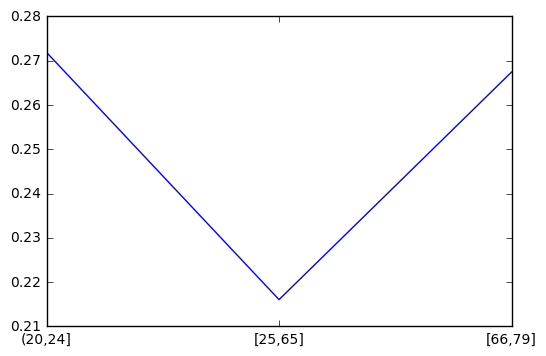

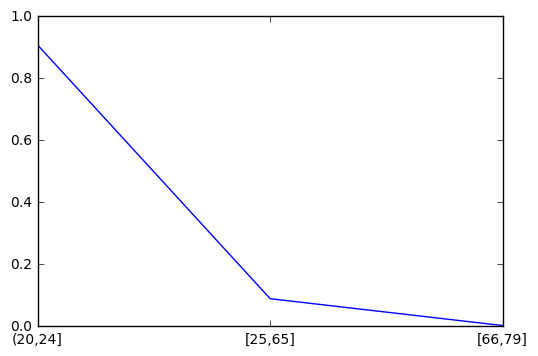

In [138]:
x = np.array([20,21,22])

my_xticks = ['(20,24]','[25,65]','[66,79]']
plt.xticks(x, my_xticks)
plt.plot(x,np_def_rate_ageG)
plt.show()

plt.xticks(x, my_xticks)
plt.plot(x,p_age_g)
plt.show()